Matplotlib is building the font cache; this may take a moment.


Direct friends for given 1 are: {2, 3, 4, 5, 6}
Recommended users: [(7, 2), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1)]


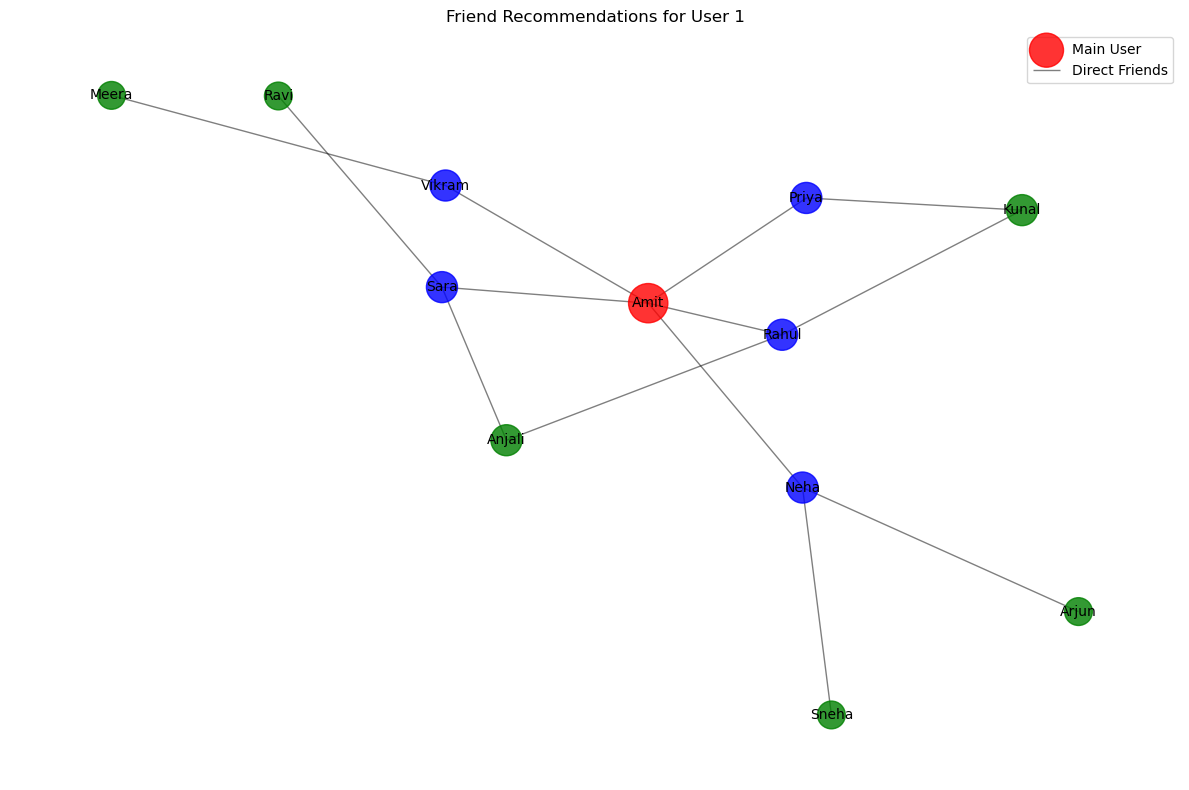

In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load file first
def load_file(filename):
    with open(filename, "r") as file:
        return json.load(file)

# Find people you may know feature
def find_people_you_may_know(user_id, data):
    # Find friends for given user
    user_friends = {}
    for user in data["users"]:
        user_friends[user['id']] = set(user['friends'])
    
    if user_id not in user_friends:
        return []

    direct_friends = user_friends[user_id]  # Fixed: using variable user_id instead of string 'user_id'
    print(f"Direct friends for given {user_id} are: {direct_friends}")
    
    suggestions = {}
    for friend in direct_friends:
        if friend in user_friends:  # Check if friend exists in user_friends
            for mutual in user_friends[friend]:
                if mutual != user_id and mutual not in direct_friends:
                    # Count mutual friends
                    suggestions[mutual] = suggestions.get(mutual, 0) + 1
    
    # Fixed: using items() method instead of items
    sorted_suggestions = sorted(suggestions.items(), key=lambda x: x[1], reverse=True)
    return [(user_id, count) for user_id, count in sorted_suggestions]

# Visualize the network with recommendations
def visualize_recommendations(user_id, data, recommendations):
    G = nx.Graph()
    
    # Add nodes
    G.add_node(user_id, color='red', size=800)  # Main user
    
    # Get user names if available, otherwise use IDs
    user_names = {}
    for user in data["users"]:
        user_names[user['id']] = user.get('name', f"User {user['id']}")
    
    # Find direct friends
    direct_friends = set()
    for user in data["users"]:
        if user['id'] == user_id:
            direct_friends = set(user['friends'])
            # Add direct friends as nodes
            for friend_id in direct_friends:
                G.add_node(friend_id, color='blue', size=500)
                G.add_edge(user_id, friend_id, weight=3)
    
    # Add recommended users as nodes
    for rec_id, strength in recommendations:
        G.add_node(rec_id, color='green', size=300 + (strength * 100))
        
        # Add edges between recommended users and mutual friends
        for user in data["users"]:
            if user['id'] == rec_id:
                for mutual in set(user['friends']) & direct_friends:
                    G.add_edge(rec_id, mutual, weight=1)
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    
    # Position nodes using spring layout
    pos = nx.spring_layout(G, seed=42)
    
    # Draw nodes with different colors
    node_colors = [G.nodes[n]['color'] for n in G.nodes()]
    node_sizes = [G.nodes[n].get('size', 300) for n in G.nodes()]
    
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    
    # Add labels
    labels = {n: user_names.get(n, str(n)) for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=10)
    
    plt.title(f"Friend Recommendations for User {user_id}")
    plt.legend(["Main User", "Direct Friends", "Recommendations"], loc="upper right")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load the data
data = load_file("massive_data.json")
user_id = 1
recommendations = find_people_you_may_know(user_id, data)
print("Recommended users:", recommendations)

# Visualize the network
visualize_recommendations(user_id, data, recommendations)